In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
# 1. Dataset Acquisition
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [3]:
# 2. Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [5]:
# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [6]:
# 3. Data Splitting (split training into train + validation)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_cat, y_val_cat = train_test_split(
    x_train, y_train_cat, test_size=0.1, random_state=42
)

In [7]:
# 4. Model Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\ProgramData\anaconda3\envs\opencv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 5. Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
# 6. Training
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val_cat),
    verbose=2
)

Epoch 1/20
422/422 - 3s - 7ms/step - accuracy: 0.9019 - loss: 0.3533 - val_accuracy: 0.9513 - val_loss: 0.1676
Epoch 2/20
422/422 - 2s - 4ms/step - accuracy: 0.9565 - loss: 0.1477 - val_accuracy: 0.9645 - val_loss: 0.1214
Epoch 3/20
422/422 - 2s - 4ms/step - accuracy: 0.9695 - loss: 0.1026 - val_accuracy: 0.9680 - val_loss: 0.1085
Epoch 4/20
422/422 - 2s - 4ms/step - accuracy: 0.9765 - loss: 0.0792 - val_accuracy: 0.9723 - val_loss: 0.0931
Epoch 5/20
422/422 - 2s - 4ms/step - accuracy: 0.9812 - loss: 0.0639 - val_accuracy: 0.9717 - val_loss: 0.1026
Epoch 6/20
422/422 - 2s - 4ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 7/20
422/422 - 2s - 4ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 0.9757 - val_loss: 0.0864
Epoch 8/20
422/422 - 2s - 5ms/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.9775 - val_loss: 0.0766
Epoch 9/20
422/422 - 2s - 4ms/step - accuracy: 0.9914 - loss: 0.0293 - val_accuracy: 0.9755 - val_loss: 0.0875
E

In [12]:
# 7. Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9729


In [13]:
# Predict labels for confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.93      0.99      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.96      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

Confusion Matrix:
[[ 965    0    0    2    1    0    8    1    1    2]
 [   0 1124    2    2    0    1    3    1    2    0]
 [   4    4  989   14    2    0    5    6    8    0]
 [   0    0    3  998    0    2    0    3    3    1]
 [   0    0    1    1  962    0    8    4    1    5]
 [   1    1    0   22    1  853    9    1    4    0]
 [   0    2    2    0    4    2  947    0    1    0]
 [   0    4    7    5    2    0    0 1003    6    1]
 [   3    3    3   13    3    5    3    1  939    1]
 [   2    4    1   17   17    3    1    8    7  949]]


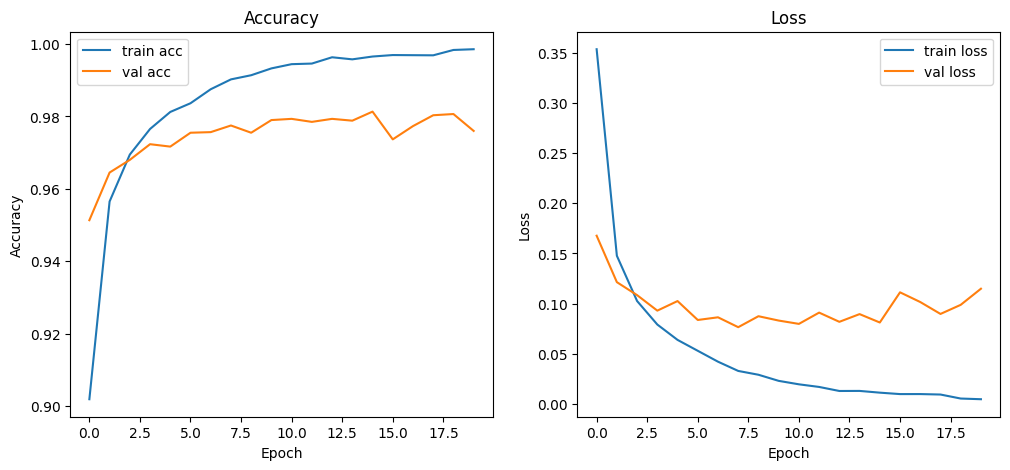

In [16]:
# 8. Visualization

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

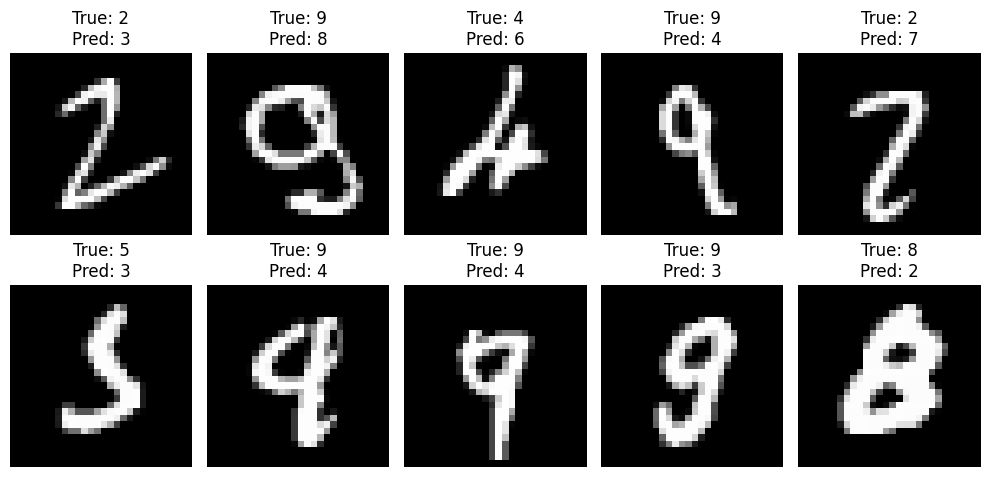

In [17]:
# Visualize some misclassified examples
misclassified_idx = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()